In [1]:
#import the relevant libraries 

import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#import data
data=pd.read_csv('diamonds_dummy.csv')
data.head()

,Unnamed: 0,carat,cut_ord,clarity_ord,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.51,4,4,1749,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,2.25,1,1,7069,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0.70,3,5,2757,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4,0.47,2,4,1243,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,0.30,5,7,789,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
#get columns name
data.columns

Index(['Unnamed: 0', 'carat', 'cut_ord', 'clarity_ord', 'price', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [10]:
#determine the independent variables (I get rid of one column for each catgorical variables because of multicollinearity problem )
#so for example if all cut are zeros thats mean the cut is good , if all color are zeros thats mean color is D 
#finally if all clarity are zeros thats mean clarity iS I1

x1=data[['carat', 'cut_Fair',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
        'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
# price is our target variable (dependent variable)
y=data['price']

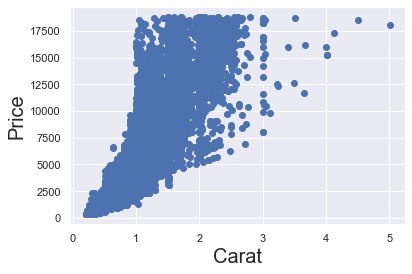

In [13]:
#plot carat and price 
plt.scatter(x1['carat'],y)
plt.xlabel('Carat', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [11]:
# add constant (intercept) to the equation
x=sm.add_constant(x1)
#use ordinary least squares method and fit the model 
result=sm.OLS(y,x).fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.038e+04
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:36:49   Log-Likelihood:            -4.2360e+05
No. Observations:               50000   AIC:                         8.472e+05
Df Residuals:                   49981   BIC:                         8.474e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6700.1236     51.461   -130.199      0.000   -6800.987   -6599.260
carat          8887.4119     12.475    712.402      0.000    8862.960    8911.864
cut_Fair       -682.1670     34.881    -19.557      0.000    -750.535    -613.799
cut_Ideal       334.9232     19.242     17.406      0.000     297.209     372.637
cut_Premium     207.0897     20.010     10.349      0.000     167.870     246.310
cut_Very Good   184.9083     20.395      9.067      0.000     144.934     224.882
color_E        -205.2428     19.041    -10.779      0.000    -242.564    -167.922
color_F        -298.6712     19.230    -15.532      0.000    -336.361    -260.981
color_G        -498.5600     18.835    -26.470      0.000    -535.476    -461.644
color_H        -966.1995     20.020    -48.262      0.000   -1005.439    -926.960
color_I       -1441.4262     22.435    -64.248      0.000   -1485.400   -1397.452
color_J       -2321.3535     27.745    -83.667      0.000   -2375.734   -2266.973
clarity_IF     5421.7898     54.176    100.078      0.000    5315.605    5527.975
clarity_SI1    3570.5622     46.370     77.002      0.000    3479.677    3661.447
clarity_SI2    2616.8703     46.560     56.204      0.000    2525.612    2708.129
clarity_VS1    4534.6855     47.337     95.796      0.000    4441.905    4627.466
clarity_VS2    4217.1400     46.617     90.464      0.000    4125.771    4308.509
clarity_VVS1   5057.7867     50.122    100.909      0.000    4959.546    5156.027
clarity_VVS2   4953.7411     48.742    101.631      0.000    4858.205    5049.277
==============================================================================
Omnibus:                    14078.910   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167730.330
Skew:                           1.015   Prob(JB):                         0.00
Kurtosis:                      11.740   Cond. No.                         38.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""